### Multinomial and logistic regression 

In [65]:
library(MASS)
library(VGAM)
library(foreign)

In [66]:
dat <- read.dta("https://stats.idre.ucla.edu/stat/data/ologit.dta") 

In [67]:
head(dat, 2)

,apply,pared,public,gpa
,<fct>,<int>,<int>,<dbl>
1,very likely,0,0,3.26
2,somewhat likely,1,0,3.21


In [68]:
# help(xtabs)

Create a contingency table (optionally a sparse matrix) from cross-classifying factors, usually contained in a data frame, using a formula interface. 

We only have 4 variables. The variable of interest is the first one, apply, how likely an undergrad student will apply to grad school (unlikely, somwhat, very).

parent education: pared, is if at least one of the 2 parents has a graduate degree. 

public: if the undergrad institute is public or private. 

gpa: undergrad gpa


In [69]:
xtabs(~ public + apply + pared, data=dat)

, , pared = 0

      apply
public unlikely somewhat likely very likely
     0      175              98          20
     1       25              12           7

, , pared = 1

      apply
public unlikely somewhat likely very likely
     0       14              26          10
     1        6               4           3


what r the predictors of the lieklihood of graduate school application? 

proportional odds ordinal logistic regression from the library MASS

REMEMBER proportional odds logistic regression the predictors are shared. were modeling the cumularive odds of being in category less than euqal to k vs a cat greater than k. in this model the covariates, the effect sizes, are shared for all regressions. with 3 cats, we have 2 regressions. 2 vs baseline. 

Call our cats 0 1 2:

0: unlikely
1: somewhat
2: very 

So one of the regressions will be 
log odds of being in group one given covariates vs group greater than group one given covariates:

LN(P(Y<=0 | X) / P(Y>0 | X)) = b01 + B1X1 + B2X2+B3X3

the other two models will be 

different intercept but same estimates:

LN(P(Y<=1 | X) / P(Y>1 | X)) = b02 + B1X1 + B2X2+B3X3

In [70]:
polr(apply ~ pared + public + gpa, data=dat, Hess=TRUE)

Call:
polr(formula = apply ~ pared + public + gpa, data = dat, Hess = TRUE)

Coefficients:
      pared      public         gpa 
 1.04769010 -0.05878572  0.61594057 

Intercepts:
   unlikely|somewhat likely somewhat likely|very likely 
                   2.203915                    4.299363 

Residual Deviance: 717.0249 
AIC: 727.0249 

In [71]:
summary(polr(apply ~ pared + public + gpa, data=dat, Hess=TRUE))

Call:
polr(formula = apply ~ pared + public + gpa, data = dat, Hess = TRUE)

Coefficients:
          Value Std. Error t value
pared   1.04769     0.2658  3.9418
public -0.05879     0.2979 -0.1974
gpa     0.61594     0.2606  2.3632

Intercepts:
                            Value   Std. Error t value
unlikely|somewhat likely     2.2039  0.7795     2.8272
somewhat likely|very likely  4.2994  0.8043     5.3453

Residual Deviance: 717.0249 
AIC: 727.0249 

We see two intercepts and 3 coefs, which is what we expect. r they statistically significant? something mildly annoying is that there are no p values. this function doesnt report p values but we can extract p values from the t values.

ASsume great degrees of freedom so compare to critical values for standard normal. 

BTW whats the interpretation of these coefs?

exponentiate them . these r odd ratios comparing, the odds of being in one group vs another but the groups are cumulative groups, so the interpretation 

In [72]:
exp(1.04)

[1] 2.829217

parental education being in the group 1 2 is 282% higher chance of being in the somewhat and very likely group comapred to the unlikely group. 

the odds ratio has two intepretations/


this thing is forcing the effect sizes to be the same. we can use the vgam package 

vector generalized linear models

In [73]:
summary(vglm(apply ~ pared + public + gpa, family=multinomial, data=dat))


Call:
vglm(formula = apply ~ pared + public + gpa, family = multinomial, 
    data = dat)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1   4.8478     1.4490   3.346 0.000821 ***
(Intercept):2   2.9688     1.4907   1.991 0.046426 *  
pared:1        -1.3742     0.4222  -3.255 0.001134 ** 
pared:2        -0.4225     0.4083  -1.035 0.300731    
public:1       -0.3601     0.4435  -0.812 0.416832    
public:2       -0.7789     0.4706  -1.655 0.097907 .  
gpa:1          -0.9240     0.4742  -1.949 0.051324 .  
gpa:2          -0.4753     0.4871  -0.976 0.329229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: log(mu[,1]/mu[,3]), log(mu[,2]/mu[,3])

Residual deviance: 713.994 on 792 degrees of freedom

Log-likelihood: -356.997 on 792 degrees of freedom

Number of Fisher scoring iterations: 5 

No Hauck-Donner effect found in any of the estimates


Reference group is level  3  of the response

What exactly is being modeled here?

The basline group is unlikely. the effect of parental education is 
(we expect parental education should make one more likely to go to grad school) 

here we havent specified proportional odds so R fits models with everything different (different intercepts and not shared effect sizes, thats why each model has different betas associated with each variable). 

do u think forcing the effect sizes to be the same with the proportional odds assumption is a good idea by looking at this?
so are u surprised that the effect sizes are negative? 

names of linear predictors"" is telling u whats actually being modeled. the baseline is 3 on the bottom. its modeling the odds of being in group 1 vs 3 and 2 vs 3. 
(unlikely vs very, somewhat vs very)
makes sense why its negative odds now 



In [74]:
exp(-1.3)

[1] 0.2725318

In [75]:
exp(-.42)

[1] 0.6570468

We can think of this as two LRs on top of each other. if we had actually fitted two LRs separately would we get the same effect sizes? is it really two independent LRs? no...

this model enforces multinomial, not binomial, so the sum of the probs is 1. if we fit two binomials the prob that we add up is not equal to 1.


all these coefs coming from a multinomial likelihood guarantees the probs add up to 1 for everyone in the 3 grad school cats. 


This is the most general model we can apply. they dont share any coefs or intercepts, they only share the likelihood add up to 1. ***

This is the most flexible model. is it really needed? can we get away with forcing the two regression models to share betas like in the proportional odds? we can fit PO with this package as well. 

instead of family=multinomial we just say family=propodds.

if u do that we can see only the two intercepts are diff and the other coefs are shared. this is a more parsimonious model, but its a strong assumption. is it a reasonable assumption to make?

it has to be tested. its hard to eyeball. if u had to eyeball it, what would u say?




In [76]:
summary(vglm(apply ~ pared + public + gpa, family=propodds, data=dat))

Warning message in eval(slot(family, "initialize")):
“response should be ordinal---see ordered()”



Call:
vglm(formula = apply ~ pared + public + gpa, family = propodds, 
    data = dat)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 -2.20335    0.78440  -2.809  0.00497 ** 
(Intercept):2 -4.29879    0.80915  -5.313 1.08e-07 ***
pared          1.04766    0.26845   3.903 9.52e-05 ***
public        -0.05867    0.28861  -0.203  0.83891    
gpa            0.61575    0.26258   2.345  0.01903 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: logitlink(P[Y>=2]), logitlink(P[Y>=3])

Residual deviance: 717.0249 on 795 degrees of freedom

Log-likelihood: -358.5124 on 795 degrees of freedom

Number of Fisher scoring iterations: 4 

No Hauck-Donner effect found in any of the estimates


Exponentiated coefficients:
    pared    public       gpa 
2.8509581 0.9430165 1.8510513 

there are a lot of graphical tests, like we can plot the odds changing, and after some transformations if theyre proportional we see parallel lines. theres a there is a formal statistical test for proportional odds.

five years ago they couldnt find a package to do it so they wrote their own. a day before he finished it he found an obscure package that did it. 


is it a good model? we have to see how well it classifies people. we know the true values. lets compare to model predicted values.

we will finish this and do survival analysis next time too. 

model building with MNLR is not easy. we talk about this next time. 

And were back
12.3.20


# Survival Analysis

In [77]:
library(survival)
library(survminer)

In [78]:
# Ovarian cancer data
df <- ovarian
head(df,2)

,futime,fustat,age,resid.ds,rx,ecog.ps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,1,72.3315,2,1,1
2,115,1,74.4932,2,1,1


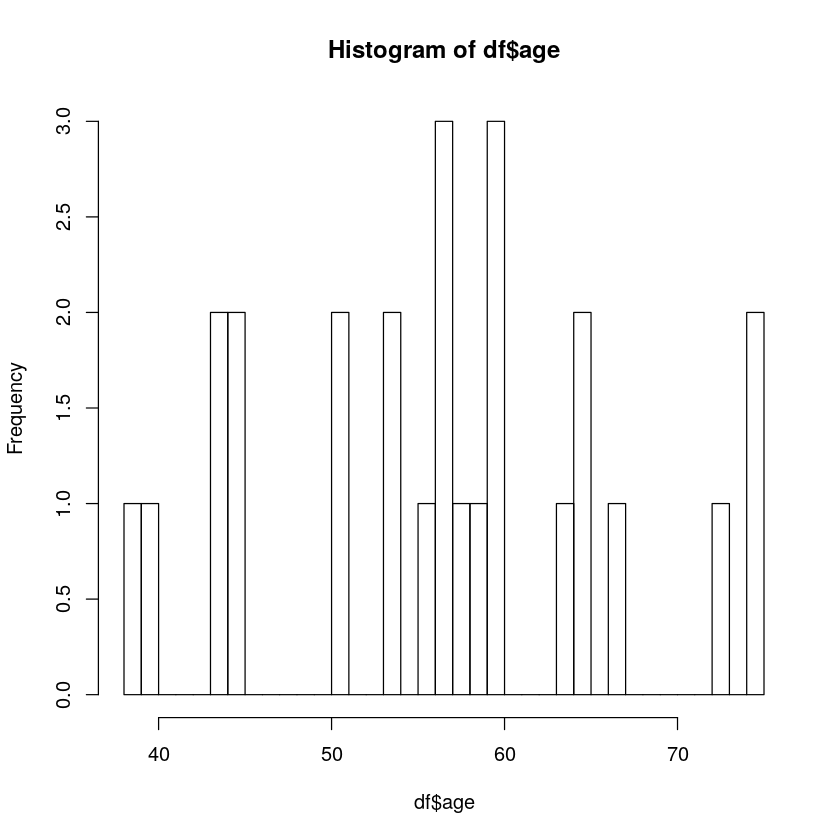

In [79]:
hist(df$age, breaks=30)

the outcome variable in survival anlysis is two things:
time to event (Death or cure or left study censor time)
variable measured survival/death or left study

so one is the continuous variable, time, and the other one is the dichotomous variable. 
so before we do anything we have to define survival objective.

In [119]:
?ovarian

In [81]:
# function called Surv with capital S, very annoying
surv.obj = Surv(time=ovarian$futime, event=ovarian$fustat)

In [82]:
surv.obj

 [1]   59   115   156   421+  431   448+  464   475   477+  563   638   744+
[13]  769+  770+  803+  855+ 1040+ 1106+ 1129+ 1206+ 1227+  268   329   353 
[25]  365   377+

if the guy lady the study, there is a 421+. we know she survied up to 421 days and possibly more. thats a censoring then. 

#### Lets create the kaplan meyer survival function and plot it

In [83]:
model = survfit(surv.obj~1, data=ovarian) # (give it a model with just intercept)

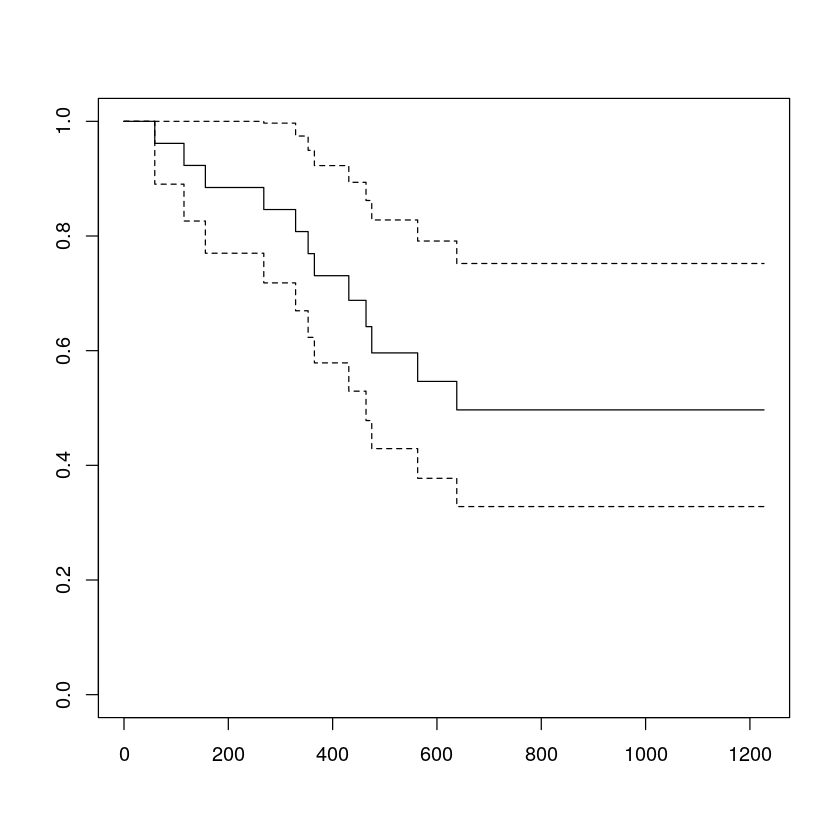

In [84]:
plot(model)

Shows 95% CIs
The CIs dont seem symmetric. The ones we created with greenwoods formula were symmetric. why is the KM not in the middle of the CI?


because there is another transformation that ensures that the CIs will not drop below 0 so this nonsymmetric transformation is the one they use here. 

next time: more serious survival analysis models. 

In [85]:
?ovarian

Dec 8. 2020

## Cox Proportional Hazard Model

baseline hazard absorbed all the time dependent features, other varations allow for it not to absorb it all. 
stratified proportional hazard model allows for multiple baseline hazards (stratified by women, men, other variations). 

Goodness of fit statistic for Cox model - measure that gives us this Concordance Index. Its very closely related to AUC. 


In [86]:
library(survival)
library(survminer)
?ovarian

In [87]:
surv.obj = Surv(time=ovarian$futime, event=ovarian$fustat) # Event type if its censoring or real event
# If there is a plus that means the person left and survived at least that much

In [88]:
# nonparametric- constructs kaplan meyer curve
# this guy needs survival object, we write a 1 cuz everyones put
# in the same group, not stratified. produced one curve for the
# entire cohort regardless of treatment.
model=survfit(surv.obj~1, data=ovarian)

In [89]:
summary(model)

Call: survfit(formula = surv.obj ~ 1, data = ovarian)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   59     26       1    0.962  0.0377        0.890        1.000
  115     25       1    0.923  0.0523        0.826        1.000
  156     24       1    0.885  0.0627        0.770        1.000
  268     23       1    0.846  0.0708        0.718        0.997
  329     22       1    0.808  0.0773        0.670        0.974
  353     21       1    0.769  0.0826        0.623        0.949
  365     20       1    0.731  0.0870        0.579        0.923
  431     17       1    0.688  0.0919        0.529        0.894
  464     15       1    0.642  0.0965        0.478        0.862
  475     14       1    0.596  0.0999        0.429        0.828
  563     12       1    0.546  0.1032        0.377        0.791
  638     11       1    0.497  0.1051        0.328        0.752

compare the actual times when people die to the output from the model. every time someone dies, we have the number of people at risk, how many experienced the event, the survival probability (calculated n-d/n, (26-1)/26, remember the KM estimator is the product of such guys), 

by the way, what wa sthe survival from time 0 to 59? 100%. Cuz first death occured at time 59. no two people can die at the exact same time. how did we end up with the .923 probability for survival? what wa sthe survival between 115 and 156? how did they get this number? hwo does the KM estimator work?

(26-1)/26  * (25-1)/25

They keep multiplying the interval specific probabilities and keep going down and down. ... ni-di / ni, and also using greenwoods forumla they find the std dev at any time point of the survival probability, from there they get the CI. this is what this table is showing us. 

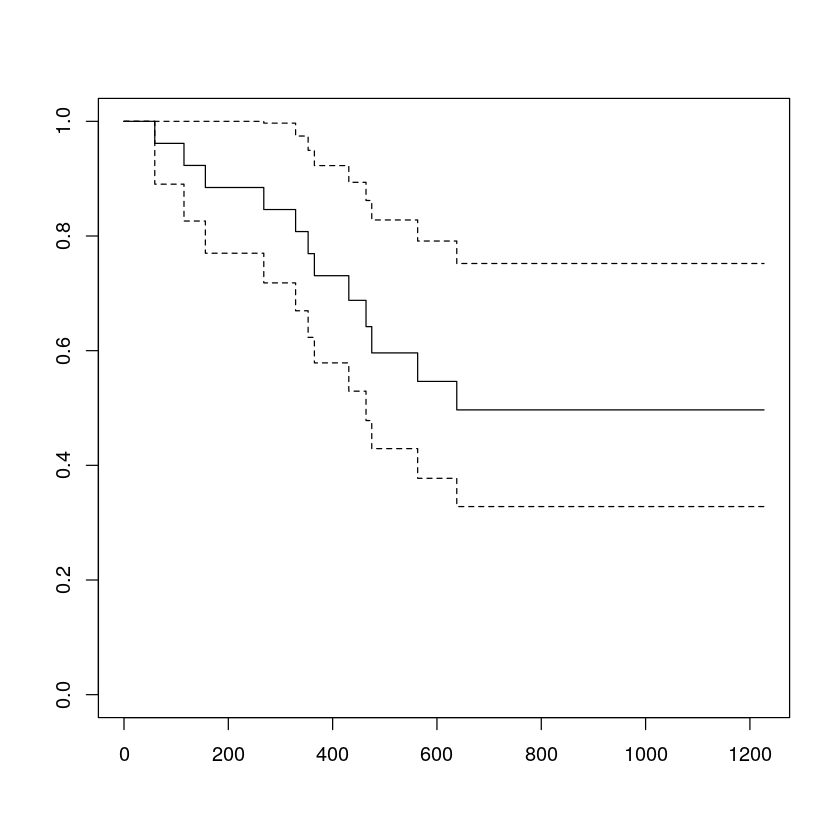

In [90]:
plot(model) # last time

We can create slightly bette rgraph

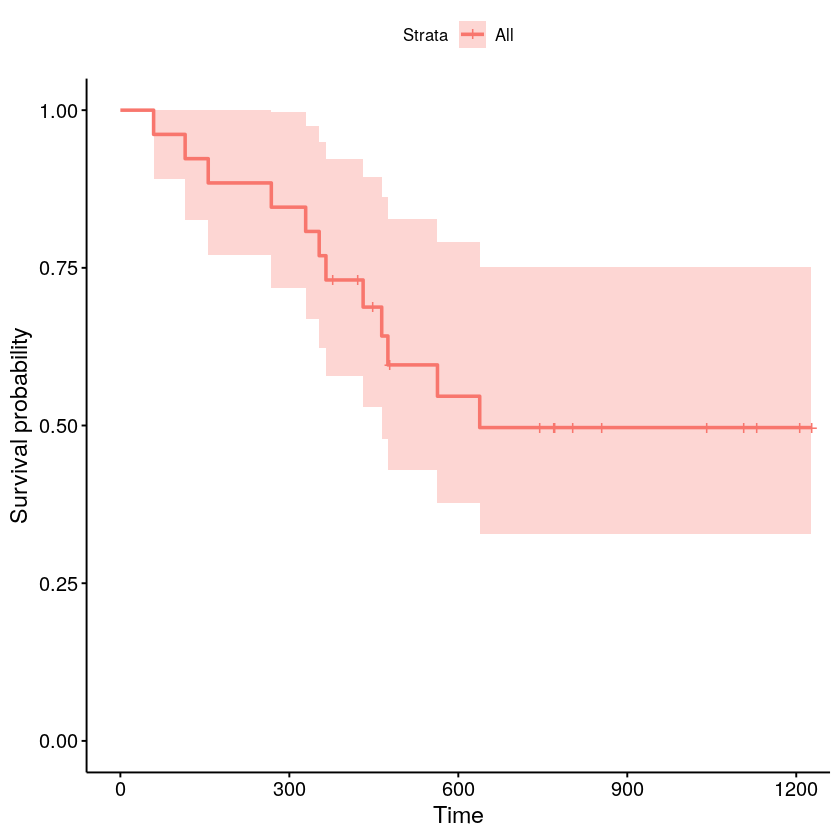

In [91]:
ggsurvplot(model)
# The notches on the graph are when people left the study 
# the line keeps flat until someone actually dies

Remember we talked about logrank statistic?
observed - expected died 
(1 hr***)

Any discrpenacy points of the two groups having different survival. well create a simple nonpara model, where we stratify by treatment.

In [92]:
model2 = survfit(surv.obj~rx, data=ovarian)
summary(model2)

Call: survfit(formula = surv.obj ~ rx, data = ovarian)

                rx=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   59     13       1    0.923  0.0739        0.789        1.000
  115     12       1    0.846  0.1001        0.671        1.000
  156     11       1    0.769  0.1169        0.571        1.000
  268     10       1    0.692  0.1280        0.482        0.995
  329      9       1    0.615  0.1349        0.400        0.946
  431      8       1    0.538  0.1383        0.326        0.891
  638      5       1    0.431  0.1467        0.221        0.840

                rx=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  353     13       1    0.923  0.0739        0.789        1.000
  365     12       1    0.846  0.1001        0.671        1.000
  464      9       1    0.752  0.1256        0.542        1.000
  475      8       1    0.658  0.1407        0.433        1.000
  563      7       1    0.564  0.1488        0.336        0.946


split the model into two groups. treatment-specific risks and deaths 

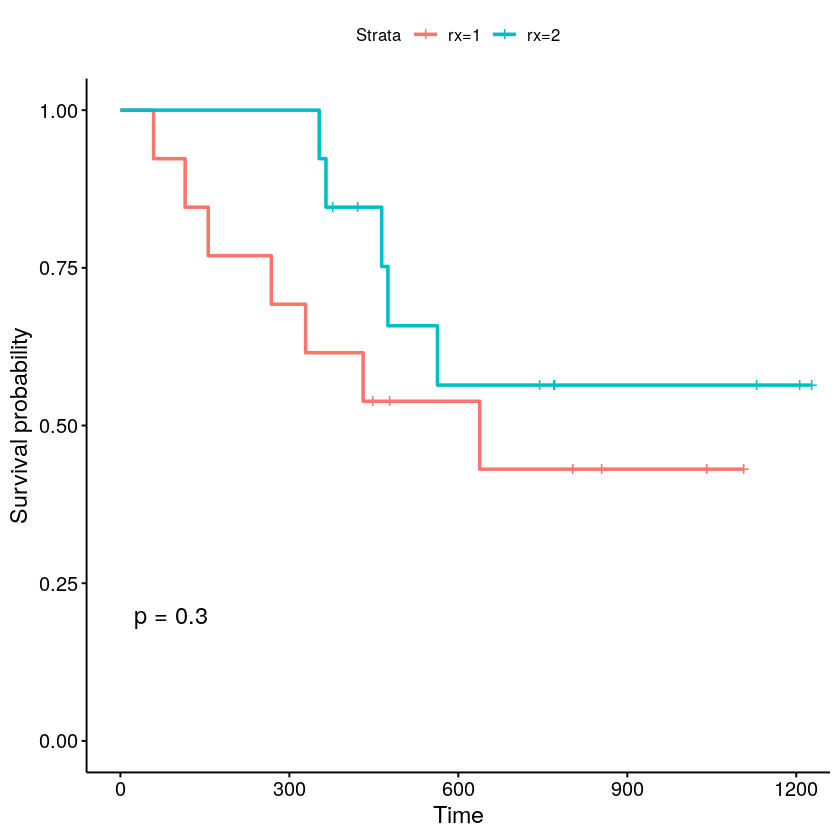

In [93]:
ggsurvplot(model2, pval=TRUE)

Two treatment arms. in the left corner we have the p value from the log rank stat that compares the survivor funciton in the two groups which here suggests theres no difference in the survival times for the people under the two treatments. 

alternative is that one group survives longer. p=.3>.05 suggests no difference in the survival times of the patients is supported by the data as evidenced by this log rank test. 

from this table, u can reconstruct the logrank statistic every time someone dies, if u want, with 2x2 contingency tables , and get the p value.

theres another variable in the data called ds. we can stratify by this guy. 

In [94]:
model3 = survfit(surv.obj~resid.ds, data=ovarian)
summary(model3)

Call: survfit(formula = surv.obj ~ resid.ds, data = ovarian)

                resid.ds=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  353     11       1    0.909  0.0867        0.754            1
  563      8       1    0.795  0.1306        0.577            1
  638      7       1    0.682  0.1536        0.438            1

                resid.ds=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   59     15       1    0.933  0.0644        0.815        1.000
  115     14       1    0.867  0.0878        0.711        1.000
  156     13       1    0.800  0.1033        0.621        1.000
  268     12       1    0.733  0.1142        0.540        0.995
  329     11       1    0.667  0.1217        0.466        0.953
  365     10       1    0.600  0.1265        0.397        0.907
  431      8       1    0.525  0.1310        0.322        0.856
  464      7       1    0.450  0.1321        0.253        0.800
  475      6       1    0.375  0.1296        0.19

Lets build our Cox model
outcome variable is the survival object we created **

In [95]:
model4 = coxph(surv.obj~rx+resid.ds+age, data=ovarian)
model4

Call:
coxph(formula = surv.obj ~ rx + resid.ds + age, data = ovarian)

            coef exp(coef) se(coef)      z       p
rx       -0.8489    0.4279   0.6392 -1.328 0.18416
resid.ds  0.6964    2.0065   0.7585  0.918 0.35858
age       0.1285    1.1372   0.0473  2.718 0.00657

Likelihood ratio test=16.77  on 3 df, p=0.0007889
n= 26, number of events= 12 

rx is treatment arm, should we have this a factor variable?


In [96]:
model4 = coxph(surv.obj~factor(rx)+factor(resid.ds)+age, data=ovarian)
model4

Call:
coxph(formula = surv.obj ~ factor(rx) + factor(resid.ds) + age, 
    data = ovarian)

                     coef exp(coef) se(coef)      z       p
factor(rx)2       -0.8489    0.4279   0.6392 -1.328 0.18416
factor(resid.ds)2  0.6964    2.0065   0.7585  0.918 0.35858
age                0.1285    1.1372   0.0473  2.718 0.00657

Likelihood ratio test=16.77  on 3 df, p=0.0007889
n= 26, number of events= 12 

did anything change? look at the coefs. theyre the same, why? because they were coded one unit away initially. thats the only way we can get away with numeric is if theyre numerically coded with adjacent numbers. 

every addtl year of age increases the risk of dying by 13%. 
residual disease markers on the test - this is not sig, people that do have it their hazard is twice as high as the hazards of those who dont have evidence of residual disease, or theres a 100% increase risk in instantaneous risk of dying

treatment group 2 compared to tmt group 1, tmt 2 people have 57% decrease in risk of dying at any time point. 57% lower compared to tmt group 1 which is the baselin gorup. 

In [97]:
summary(ovarian)

     futime           fustat            age           resid.ds    
 Min.   :  59.0   Min.   :0.0000   Min.   :38.89   Min.   :1.000  
 1st Qu.: 368.0   1st Qu.:0.0000   1st Qu.:50.17   1st Qu.:1.000  
 Median : 476.0   Median :0.0000   Median :56.85   Median :2.000  
 Mean   : 599.5   Mean   :0.4615   Mean   :56.17   Mean   :1.577  
 3rd Qu.: 794.8   3rd Qu.:1.0000   3rd Qu.:62.38   3rd Qu.:2.000  
 Max.   :1227.0   Max.   :1.0000   Max.   :74.50   Max.   :2.000  
       rx         ecog.ps     
 Min.   :1.0   Min.   :1.000  
 1st Qu.:1.0   1st Qu.:1.000  
 Median :1.5   Median :1.000  
 Mean   :1.5   Mean   :1.462  
 3rd Qu.:2.0   3rd Qu.:2.000  
 Max.   :2.0   Max.   :2.000  

baseline hazard is canceled out in ratio. only effective covariates ther eis no baseline hazard. cox model doesnt allow us to estimate the baseline hazard intercepts.

its funny u compbined NP est of KM with semiparametric of cox (1 hr 18)

straitfied cox proportional models, add interactions. 
btw the CPH is not always true, it can be tested. 

12.10.20

In [99]:
# fit <- coxph(surv.obj ~rx + resid.id + ecog.ps, data=ovarian)
temp <- cox.zph(model4)

31 min** 

PH assumption seems to hoold
if the PHA holds, 

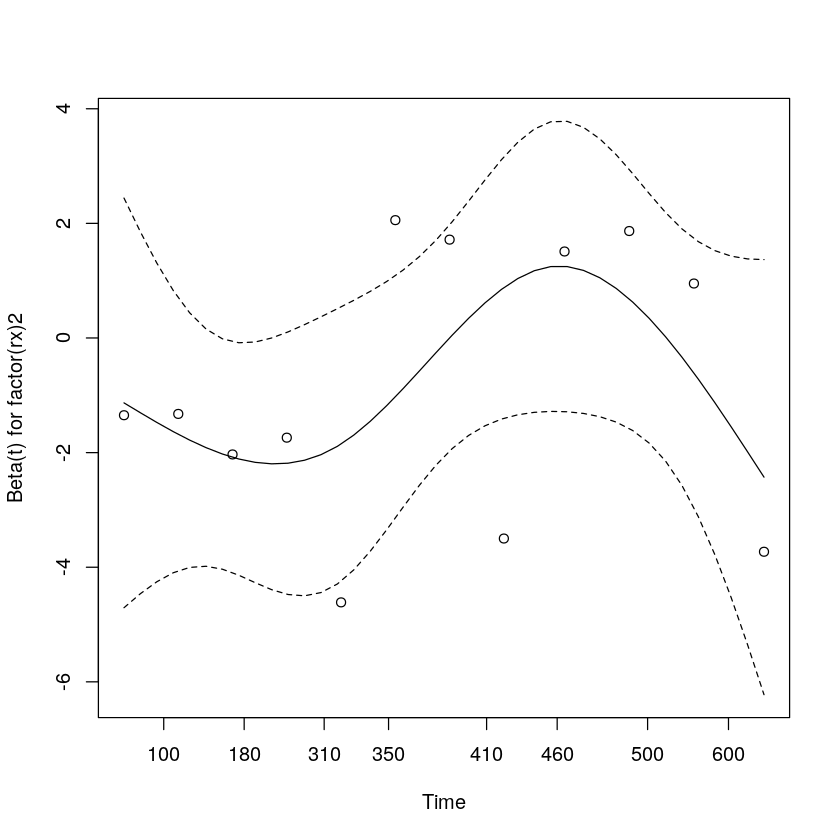

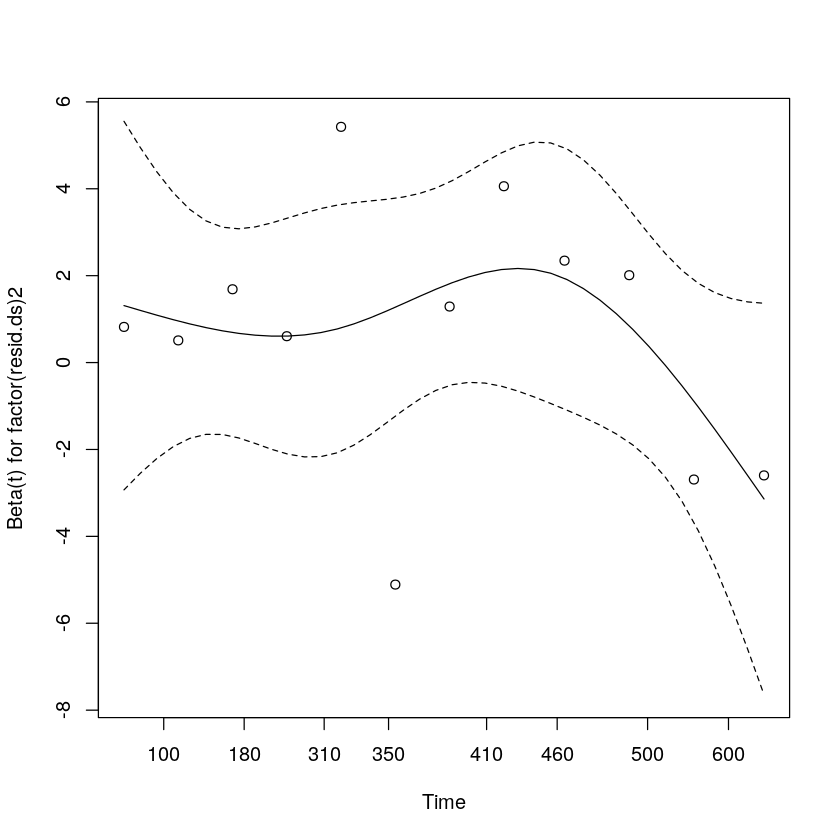

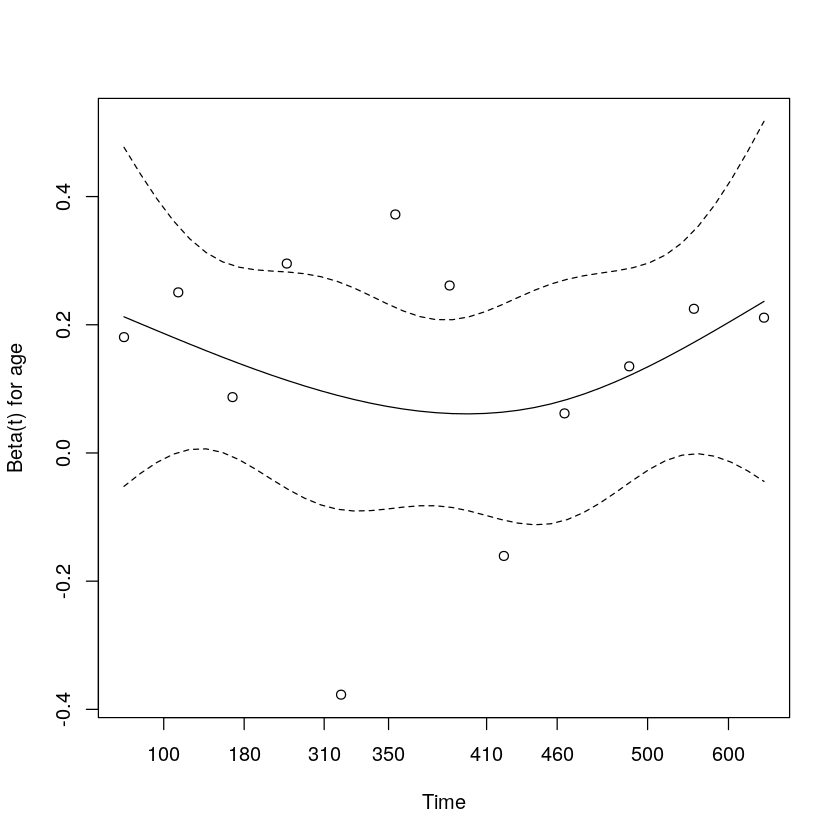

In [100]:
plot(temp)

plot analysis at 32-33
having a flat line on the 0 confirms that the p values are greater then 0.05 and the PHA Holds. all the variables do not contradict the PHA of the cox model . 

imagine somehow this test for PH was rejected WRT a certain variable rx, this will tell me that the variable being just covariate in the model is not enough, and that we have to assume different baseline hazards for the people in the two groups.

instead of having the variable as a covariate in the cox model, well do the strata. 

In [101]:
# ggsurvplot(model4, data=ovarian)
# ggforest(model4, data=ovarian)

ERROR: Error in ggsurvplot(model4, data = ovarian): object 'ggsurv' not found


In [104]:
model5 = coxph(surv.obj~factor(rx)+strata(resid.ds)+ecog.ps, data=ovarian)
summary(model5)
# Using it as a stratification variable

Call:
coxph(formula = surv.obj ~ factor(rx) + strata(resid.ds) + ecog.ps, 
    data = ovarian)

  n= 26, number of events= 12 

               coef exp(coef) se(coef)      z Pr(>|z|)
factor(rx)2 -0.6831    0.5051   0.5981 -1.142    0.253
ecog.ps      0.5291    1.6975   0.5911  0.895    0.371

            exp(coef) exp(-coef) lower .95 upper .95
factor(rx)2    0.5051     1.9799    0.1564     1.631
ecog.ps        1.6975     0.5891    0.5329     5.407

Concordance= 0.65  (se = 0.082 )
Likelihood ratio test= 2.08  on 2 df,   p=0.4
Wald test            = 2.03  on 2 df,   p=0.4
Score (logrank) test = 2.09  on 2 df,   p=0.4


whats the interpretation of the effect sizes now 

assuming different baseline hazards for some people who have resid disease diagnostics and those that dont. 

whats interpretation of treatment group and this other test?

Can we say that ppl in tmt group 1 have 50% reduced risk of dying compared to baseline?
remember the hazards now different for each strata for (resid )

can only give interpretation within a group since the baseline hazards dont cancel in the ratio of hazards

we see concordance score of .65. remember we strat for no good reason, the conc idx without strat was .74, so we had a good baseline model. there is a price to pay for uncessary strat. 
if you do strat when u need, the conc improves, and u gain precision. 







### Longitudinal Study

In [105]:
d = read.csv("/home/celeste/Documents/git/cs-624/classwork/hafr.csv")

24 animals were measured 20+ times repeatedly over time
they were touched/attacked, the important variable is dur, the length of time is took them to protect themselves. 

the head variable is if they touched their tail or their head. 

were attacked by a predator at time 0 

q: how does the big attack at time 0 effect their ability to defend themselves after the attack and how long does this deteriorated state last? This is definitely a longitudinal study.

If someone gave us this data what would we do?
We have repreated msmts per animal
interested in explaining the time it took the animal to react. what is the pattern? what model would be appropriate for such data? we dont know yet cuz we never had longitudinal data, which is repeated msmts per obs. 

when u have repeated msmts ( over time or at same time) 
measure thickness of leaf in multiple locations, but time is not improtant, is at the same time. 

here time is critically important. correlated for same subjects, a longitudinal model needs to be deployed. the big difference is that  instead of indept obs, here we have bunches of correlated obs, so we have to model this correlation, and this is achieved thru "random effects". other models were "Fixed effect" with intercept and slope coefs, std devs, to do z tests. 

Random effects are RVs that u put into the model to model the correlation structure, not the mean of the model (Fixed effect, how does the mean change). This models complex correlation structure. unless there is a complex sampling, we dont need it but this example needs to explicitly model the corr structure in the obs. one of the ways to do this is with random effects. well need a new pkg. 



the model needs to know which obs are form the same animal. so we need to create an ID variable.

In [110]:
library(lme4)

In [114]:
# Making this up for the example
d$ID=c(rep(1:57, rep(10,57)),rep(58,6))

In [115]:
# In longitudinal studies its critically important to have an ID
# You dont need to have the same number of obs per person
# we use this to define our random effects, use this to create a 
# corr struc matrix that explicitly reflects the corr stuct for the rep msmts of the same subject

What is the q of interest here?
Duration of how long it takes for them to defend themselves in the big attack.

touch, touch, 5 min, attack, 5 min touch, touch 

is there a difference in response time befroe and after the attack?
is there a delayed reaction after the attack?
how long does the effect last if it exists? 
is there a difference between touching the head and touching the tail?

is there a complex relationship between time and response time, not only between pre and post attack... nonlinear pattern of repsonse time. 

Well answer at least 1 question before we go. 

In [117]:
lm(Dur~I(Time>0), data=d)


Call:
lm(formula = Dur ~ I(Time > 0), data = d)

Coefficients:
    (Intercept)  I(Time > 0)TRUE  
          8.089            2.342  


we would do something like this if the obs were indept but theyre not. 

In [118]:
# Linear mixed effect models 
# this will not run without the random effect, with is
# the second part with the id variable

# Says roles with the same ID index pertain to the same person
# model the correlation structure that way 
# We have a fixed effect, effect of time (discretized), and
# have accounted for the correlation scrutcure and we see
# what is the effect of time?
summary(lmer(Dur~I(Time>0) + (1|ID), data=d))

Linear mixed model fit by REML ['lmerMod']
Formula: Dur ~ I(Time > 0) + (1 | ID)
   Data: d

REML criterion at convergence: 2877

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0541 -0.5623 -0.1837  0.3452  7.9343 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  3.36    1.833   
 Residual             18.53    4.305   
Number of obs: 491, groups:  ID, 56

Fixed effects:
                Estimate Std. Error t value
(Intercept)       8.0140     0.5205  15.397
I(Time > 0)TRUE   2.3959     0.6494   3.689

Correlation of Fixed Effects:
            (Intr)
I(Tm>0)TRUE -0.795

U can see the effect of time is 3.698 after accounting for the corr. structure. its a t disn so u can kind of compare to std normal so anything above 1.95 is stat sig, so there is def a sig difference accounting for the correlation structure before and after the attack. 

how much bigger is the response time after they were attacked? 2.39 seconds longer. the animal is distraught and reacts slower to gentle stimulation. 